# Image Denoising Challenge

The goal for this challenge is to leverage your knowledge of Deep Learning to design and train a denoising model. For a given noisy image $X$, our model should learn to predict the denoised image $y$.


**Objectives**
- Visualize images
- Preprocess images for the neural network
- Fit a custom CNN for the task

## 1. Load Data

👉 Let's download the dataset archive.
It contains RGB and Black & White images we will be using for the rest of this challenge.

In [1]:
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/paintings.zip > paintings.zip
! unzip -nq "paintings.zip" 
! rm "paintings.zip"
! ls -l

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 90.1M  100 90.1M    0     0  24.5M      0  0:00:03  0:00:03 --:--:-- 24.5M
total 3952
-rw-r--r--     1 leonardtheret  staff        0 Jun 29 09:28 README.md
-rw-r--r--@    1 leonardtheret  staff  2022337 Jun 30 10:54 image_denoising.ipynb
drwx------  1087 leonardtheret  staff    34784 Jun  9 15:06 paintings
drwxr-xr-x     4 leonardtheret  staff      128 Jun 30 09:32 tests


In [2]:
import glob

dataset_paths = glob.glob("./paintings/*.jpg")
dataset_paths

['./paintings/Joan_Miro_48.jpg',
 './paintings/Titian_232.jpg',
 './paintings/Amedeo_Modigliani_30.jpg',
 './paintings/Frida_Kahlo_21.jpg',
 './paintings/Marc_Chagall_59.jpg',
 './paintings/Salvador_Dali_116.jpg',
 './paintings/Vincent_van_Gogh_363.jpg',
 './paintings/Paul_Klee_47.jpg',
 './paintings/Kazimir_Malevich_106.jpg',
 './paintings/Leonardo_da_Vinci_7.jpg',
 './paintings/Francisco_Goya_199.jpg',
 './paintings/Vincent_van_Gogh_161.jpg',
 './paintings/Paul_Klee_90.jpg',
 './paintings/Paul_Cezanne_24.jpg',
 './paintings/Peter_Paul_Rubens_42.jpg',
 './paintings/Amedeo_Modigliani_184.jpg',
 './paintings/Titian_52.jpg',
 './paintings/Alfred_Sisley_165.jpg',
 './paintings/Paul_Gauguin_72.jpg',
 './paintings/Vincent_van_Gogh_767.jpg',
 './paintings/Raphael_106.jpg',
 './paintings/Pablo_Picasso_78.jpg',
 './paintings/Diego_Rivera_10.jpg',
 './paintings/Pieter_Bruegel_108.jpg',
 './paintings/Hieronymus_Bosch_25.jpg',
 './paintings/Joan_Miro_6.jpg',
 './paintings/Kazimir_Malevich_79.jpg'

❓ **Display the image at index `53` of this dataset_paths (i.e the 54-th image)**

<details>
    <summary>Hint</summary>
    Use the <code>PIL.Image.open</code> and <code>matplotlib.pyplot.imshow</code> functions.
</details>

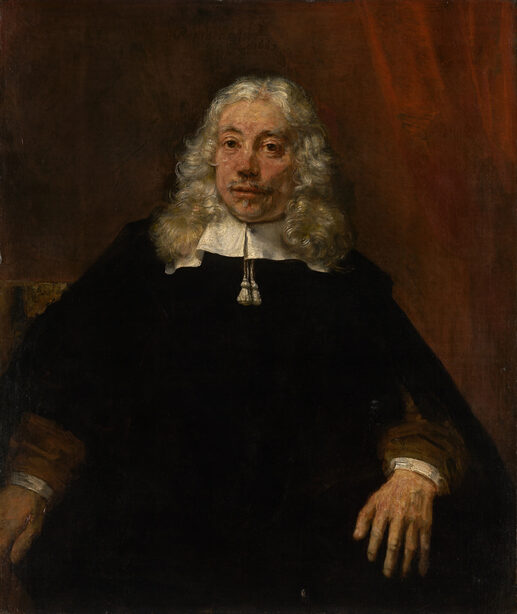

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

imge = Image.open(dataset_paths[53])
imge

❓ **What is the shape of the image you displayed above `img_shape`?  How many dimensions `img_dim` does it have ?**

In [4]:
img_shape = imge.size
print(img_shape)
img_dim = len(np.asarray(imge).shape)
print(img_dim)

(517, 614)
3


❓ **What was in the image above?**

In [5]:
img_shape = img_shape
img_dim = img_dim

# Uncomment the correct answer

#is_portrait = True
is_portrait = False

is_colored_image = True
#is_colored_image = False

In [6]:
from nbresult import ChallengeResult
result = ChallengeResult(
    'data_loading',
    img_shape=img_shape,
    img_dim=img_dim,
    is_portrait=is_portrait,
    is_colored_image=is_colored_image
)

result.write()

## 2. Processing

❓ **Store all images from the dataset folder in a list of numpy arrays called `dataset_images`**

- It can take a while
- If the dataset is too big to fit in memory, just take the first half (or quarter) of all pictures

In [7]:
# YOUR CODE HERE
dataset_images = []
for image in dataset_paths:
    inter = Image.open(image)
    a = np.asarray(inter)
    dataset_images.append(a)
    
dataset_images

[array([[[ 91,  85,  95],
         [ 92,  86,  96],
         [ 97,  90,  98],
         ...,
         [110,  78,  79],
         [115,  82,  91],
         [117,  84,  93]],
 
        [[101,  95, 105],
         [ 94,  88,  98],
         [ 89,  82,  90],
         ...,
         [110,  78,  79],
         [105,  72,  81],
         [107,  74,  83]],
 
        [[101,  95, 105],
         [ 96,  90, 100],
         [ 91,  84,  92],
         ...,
         [106,  74,  75],
         [109,  76,  85],
         [110,  77,  86]],
 
        ...,
 
        [[ 92,  91, 109],
         [ 46,  45,  63],
         [ 73,  71,  85],
         ...,
         [ 88,  70,  66],
         [ 82,  61,  58],
         [ 82,  61,  58]],
 
        [[100,  98, 119],
         [ 55,  54,  72],
         [ 81,  79,  93],
         ...,
         [ 81,  63,  61],
         [ 77,  57,  56],
         [ 77,  57,  56]],
 
        [[126, 124, 145],
         [ 82,  81,  99],
         [106, 103, 120],
         ...,
         [ 97,  79,  79],
  

### 2.1 Reshape, Resize, Rescale

Let's simplify our dataset and convert it to a single numpy array

❓ **First, check if that all the images in the dataset have the same number of dimensions**.
- What do you notice?
- How do you explain it? 

In [8]:
len(np.asarray(imge).shape)

listi = []
for img in dataset_images:
    listi.append(len(np.asarray(img).shape))

print(listi.count(2))
print(listi.count(3))


72
1013


In [9]:
notice = '1013 have 3 dimensions, 72 have 2 dimensions'
print(notice)
explanation = 'Some images are in color (3 dimensions), some are in black & white (2 dimensions)'
print(explanation)

1013 have 3 dimensions, 72 have 2 dimensions
Some images are in color (3 dimensions), some are in black & white (2 dimensions)


👉 We convert for you all black & white images into 3-colored ones by duplicating the image on three channels, so as to have only 3D arrays

In [10]:
from tqdm import tqdm

In [11]:
dataset_images = [x if x.ndim==3 else np.repeat(x[:,:,None], 3, axis=2) for x in tqdm(dataset_images)]
set([x.ndim for x in dataset_images])

100%|██████████| 1085/1085 [00:00<00:00, 1239.94it/s]


{3}

❓ **What about their shape now ?**
- Do they all have the same width/heights ? If not:
- Resize the images (120 pixels height and 100 pixels width) in the dataset, using `tensorflow.image.resize` function.
- Now that they all have the same shape, store them as a numpy array `dataset_resized`.
- This array should thus be of size $(n_{images}, 120, 100, 3)$

In [12]:
###CHECK SIZE

listi1 = []
listi2 = []
for img in dataset_images:
    listi1.append(np.asarray(img).shape[0])
    listi2.append(np.asarray(img).shape[1])

print(listi1)
print(listi2)

[358, 627, 484, 484, 461, 480, 614, 401, 600, 425, 639, 614, 362, 322, 474, 484, 556, 427, 489, 419, 614, 653, 480, 614, 234, 270, 360, 424, 660, 1229, 787, 299, 573, 971, 526, 1229, 586, 360, 742, 614, 466, 482, 461, 614, 1229, 600, 670, 461, 253, 480, 614, 614, 615, 614, 361, 347, 614, 515, 365, 600, 1010, 629, 842, 960, 801, 445, 484, 365, 284, 614, 288, 575, 484, 461, 480, 363, 480, 614, 480, 614, 616, 893, 558, 614, 667, 452, 614, 614, 352, 674, 461, 180, 534, 403, 688, 614, 499, 281, 461, 574, 461, 634, 662, 390, 586, 614, 450, 670, 1229, 450, 629, 1214, 461, 633, 617, 579, 484, 315, 430, 814, 589, 324, 487, 765, 334, 886, 476, 484, 277, 476, 308, 614, 394, 494, 340, 614, 629, 635, 461, 614, 614, 348, 749, 461, 1229, 461, 480, 660, 632, 599, 484, 1229, 960, 461, 286, 345, 769, 614, 596, 388, 590, 412, 440, 614, 779, 568, 614, 484, 480, 240, 360, 360, 228, 622, 742, 614, 420, 960, 781, 522, 399, 396, 600, 663, 614, 358, 720, 484, 1003, 614, 484, 1229, 462, 680, 546, 571, 691, 480,

In [13]:
import tensorflow as tf

In [14]:
img_resized = []
for img in dataset_images:
    img = tf.image.resize(img,[120,100])
    img_resized.append(img)

In [16]:
###CHECK SIZE

listi1 = []
listi2 = []
for img in img_resized:
    listi1.append(np.asarray(img).shape[0])
    listi2.append(np.asarray(img).shape[1])

print(listi1)
print(listi2)

[120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120,

In [17]:
dataset_resized = np.asarray(img_resized)

In [18]:
dataset_resized.shape

(1085, 120, 100, 3)

❓ **Rescale the data of each image between $0$ and $1$**
- Save your resulting list as `dataset_scaled`

In [19]:
def norm(x):
    x = x/255
    return x

In [22]:
img_scaled = []
for img in dataset_resized:
    img_scaled.append(norm(img))

In [23]:
dataset_scaled = np.asarray(img_scaled)

### 2.2 Create (X,y) sets

👉 Now, we'll add for you some **random noise** to our images to simulate noise (that our model will try to remove later)

In [25]:
NOISE_LEVEL = 0.2

dataset_noisy = np.clip(
    dataset_scaled + np.random.normal(
        loc=0,
        scale=NOISE_LEVEL,
        size=dataset_scaled.shape
    ).astype(np.float32),
    0,
    1
)
dataset_noisy.shape

(1085, 120, 100, 3)

❓ **Plot a noisy image below to visualize the noise and compare it with the normal one**

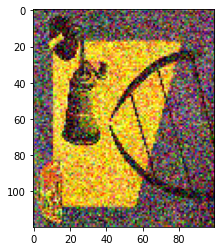

In [35]:
plt.imshow(dataset_noisy[0])

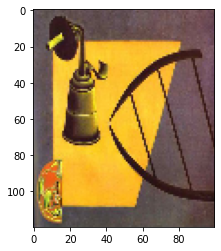

In [34]:
plt.imshow(dataset_scaled[0])

❓ **Create your `(X_train, Y_train)`, `(X_test, Y_test)` training set for your problem**

- Remember you are trying to use "noisy" pictures in order to predict the "normal" ones.
- Keeping about `20%` of randomly sampled data as test set

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(dataset_noisy, dataset_scaled, test_size=0.2)

In [39]:
from nbresult import ChallengeResult
result = ChallengeResult(
    "preprocessing",
    X_train_shape = X_train.shape,
    Y_train_shape = Y_train.shape,
    X_std = X_train[:,:,:,0].std(),
    Y_std = Y_train[:,:,:,0].std(),
    first_image = Y_train[0]
)
result.write()

## 3. Convolutional Neural Network

A commonly used neural network architecture for image denoising is the __AutoEncoder__.

<img src='https://github.com/lewagon/data-images/blob/master/DL/autoencoder.png?raw=true'>

Its goal is to learn a compact representation of your data to reconstruct them as precisely as possible.  
The loss for such model must incentivize it to have __an output as close to the input as possible__.

For this challenge, __you will only be asked to code the Encoder part of the network__, since building a Decoder leverages layers architectures you are not familiar with (yet).

👉 Run this code below if you haven't managed to build your own (X,Y) training sets. This will load them as solution

```python
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/data_painting_solution.pickle > data_painting_solution.pickle

import pickle
with open("data_painting_solution.pickle", "rb") as file:
    (X_train, Y_train, X_test, Y_test) = pickle.load(file)
    
! rm data_painting_solution.pickle
```

### 3.1 Architecture

👉 Run the cell below that defines the decoder

In [120]:
import tensorflow as tf
from tensorflow.keras import layers, losses, Sequential

In [121]:
# We choose to compress images into a latent_dimension of size 6000
latent_dimensions = 6000

# We build a decoder that takes 1D-vectors of size 6000 to reconstruct images of shape (120,100,3)
decoder = Sequential(name='decoder')
decoder.add(layers.Reshape((30, 25, 8), input_dim=latent_dimensions))
decoder.add(layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2D(filters=3, kernel_size=3, padding="same", activation="sigmoid"))
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 30, 25, 8)         0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 60, 50, 16)        1168      
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 120, 100, 32)      4640      
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 120, 100, 3)       867       
Total params: 6,675
Trainable params: 6,675
Non-trainable params: 0
_________________________________________________________________


❓ **Now, build the `encoder` that plugs correctly with the decoder defined above**. Make sure that:
- The output of your `encoder` is the same shape as the input of the `decoder`
- Use a convolutional neural network architecture without transfer learning
- Keep it simple
- Print model summary

In [122]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def build_encoder(dim):
    '''returns an encoder model, of output_shape equals to latent_dimension'''
    encoder = Sequential()
    
    encoder.add(Conv2D(8, (2,2), input_shape=(120, 100, 3), activation='relu'))
    encoder.add(MaxPooling2D(2))

    encoder.add(Conv2D(16, (2, 2), activation='relu'))
    encoder.add(MaxPooling2D(2))

    encoder.add(Conv2D(32, (2, 2), activation='relu'))
    encoder.add(MaxPooling2D(2))     

    encoder.add(Flatten())
    encoder.add(Dense(dim, activation='tanh'))
    
    return encoder

In [123]:
encoder = build_encoder(latent_dimensions)
encoder.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 119, 99, 8)        104       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 59, 49, 8)         0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 58, 48, 16)        528       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 29, 24, 16)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 28, 23, 32)        2080      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 14, 11, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 4928)            

👉 **Test your encoder below**

In [124]:
# HERE WE BUILD THE AUTO-ENCODER (ENCODER + DECODER) FOR YOU. IT SHOULD PRINT A NICE SUMMARY
from tensorflow.keras.models import Model

x = layers.Input(shape=(120, 100, 3))
autoencoder = Model(x, decoder(encoder(x)), name="autoencoder")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 120, 100, 3)]     0         
_________________________________________________________________
sequential_13 (Sequential)   (None, 6000)              29576712  
_________________________________________________________________
decoder (Sequential)         (None, 120, 100, 3)       6675      
Total params: 29,583,387
Trainable params: 29,583,387
Non-trainable params: 0
_________________________________________________________________


### 3.2 Training

❓ **Before training the autoencoder, evaluate your baseline score**
- We will use the mean absolute error in this challenge
- Compute the baseline score on your test set in the "stupid" case where you don't manage to de-noise anything at all.
- Store the result under `score_baseline`

In [125]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [126]:
X_test[0].shape

(120, 100, 3)

In [131]:
def compile_encoder(encode):
    encode.compile(loss='mae',
                  optimizer='adam',
                  metrics = ['mae'])
    return encode

encode = compile_encoder(encoder)

In [ ]:
encode.fit(X_train, y_train_cat, 
          epochs=10, 
          batch_size=32, 
          verbose=1)

In [ ]:
def compile_encoder(encode):
    encode.compile(loss='mae',
                  optimizer='adam',
                  metrics = ['mae'])
    return encode

❓ Now, **train your autoencoder**

- Use an appropriate loss
- Adapt the learning rate of your optimizer if convergence is too slow/fast
- Make sure your model does not overfit with appropriate control techniques

💡 You will not be judged by the computing power of your computer, you can reach decent performance in less than 5 minutes of training without GPUs.

In [102]:
# YOUR CODE HERE
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience=2)

history = autoencoder(score_baseline).fit(X_train, Y_train,
                    batch_size=32,
                    epochs=10,
                    validation_split=0.3,
                    callbacks=[es],
                    verbose=1) #show the progress

print(model.evaluate(X_test, y_test_cat, verbose=0))

InvalidArgumentError: input must be 4-dimensional[868,6000] [Op:Conv2D]

❓ **Plot your training and validation loss at each epoch using the cell below**

In [583]:
# Plot below your train/val loss history
# YOUR CODE HERE
# YOUR CODE HERE
# YOUR CODE HERE


# Run also this code to save figure as jpg in path below (it's your job to ensure it works)
fig = plt.gcf()
plt.savefig("tests/history.png")

❓ **Evaluate your performances on test set**
- Compute your de-noised test set `Y_pred` 
- Store your test score as `score_test`
- Plot a de-noised image from your test set and compare it with the original and noisy one using the cell below

In [585]:
# YOUR CODE HERE

NameError: name 'Y_pred' is not defined

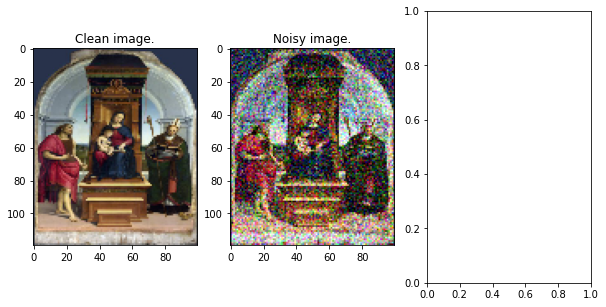

In [100]:
# RUN THIS CELL TO CHECK YOUR RESULTS
idx = 0

fig, axs = plt.subplots(1,3, figsize=(10,5))
axs[0].imshow(Y_test[idx])
axs[0].set_title("Clean image.")

axs[1].imshow(X_test[idx])
axs[1].set_title("Noisy image.")

axs[2].imshow(Y_pred[idx])
axs[2].set_title("Prediction.")

# Run this to save your results for correction
plt.savefig('tests/image_denoised.png')

🧪 **Send your results below**

In [588]:
from nbresult import ChallengeResult

result = ChallengeResult(
    "network",
    input_shape = list(encoder.input.shape),
    output_shape = list(encoder.output.shape),
    layer_names = [layer.name for layer in encoder.layers],
    trainable_params = sum([tf.size(w_matrix).numpy() for w_matrix in encoder.trainable_variables]),
    score_baseline = score_baseline,
    score_test = score_test,
)
result.write()